In [55]:
# We try the most simple approach to prune and see how it works with CIFAR-C.
from pruneshift.datasets import CIFAR100C, CIFAR10C, ImageNet100C
from pruneshift.datamodules import datamodule, CIFAR10AugmixCModule
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch

DATA_PATH = os.environ["DATASET_PATH"]
IMAGENET_PATH = "/misc/scratchSSD2/datasets/ILSVRC2012-100/"
IMAGENET_CORRUPTED = "/misc/scratchSSD2/datasets/ILSVRC2012-100/corrupted"


def augmix_vis(name, n, path=DATA_PATH):
    dm = datamodule(name, path, with_normalize=False)
    fig, axes = plt.subplots(n, 3, figsize=(8, 8))
    dm.prepare_data()
    dm.setup("fit")
    data_iter = iter(dm.train_dataloader())
    for lvl, row in enumerate(axes):
        imgs, y = next(data_iter)
        for idx, ax in enumerate(row):
            img = (255 * imgs[idx][0]).permute([1, 2, 0]).to(torch.uint8).numpy()
            ax.imshow(Image.fromarray(img))
            ax.axis('off')

def vis(name, n, path=DATA_PATH):
    dm = datamodule(name, path, with_normalize=False)
    fig, axes = plt.subplots(n, 3, figsize=(8, 8))
    dm.prepare_data()
    dm.setup("fit")
    data_iter = iter(dm.train_dataloader())
    for lvl, row in enumerate(axes):
        for idx, ax in enumerate(row):
            imgs, y = next(data_iter)
            img = (255 * imgs[0]).permute([1, 2, 0]).to(torch.uint8).numpy()
            ax.imshow(Image.fromarray(img))
            ax.axis('off')

def vis_labels(name, path=DATA_PATH):
    dm = datamodule(name, path, batch_size=1000)
    dm.setup("fit")
    _, y_batch = next(iter(dm.train_dataloader()))
    plt.hist(np.array(y_batch))
    

def corruption(dataset_cls, corruptions=["snow", "brightness", "pixelate", "glass_blur"], path=DATA_PATH):
    images = []
    for corr in corruptions:
        data = dataset_cls(path, corr).lvl_subsets()[-1]
        images.append(data[-1][0])
    
    fig, axes = plt.subplots(len(images), 1, figsize=(6, 10))

    for label, ax, img in zip(corruptions, axes, images):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)

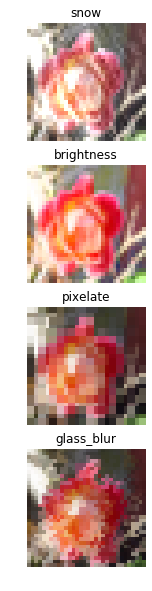

In [56]:
corruption(CIFAR100C)

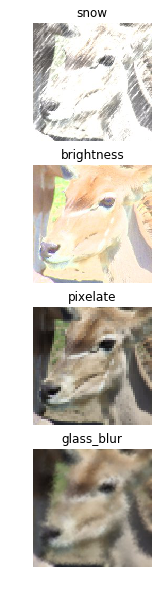

In [57]:
corruption(ImageNet100C, path=IMAGENET_CORRUPTED)

Files already downloaded and verified
Files already downloaded and verified


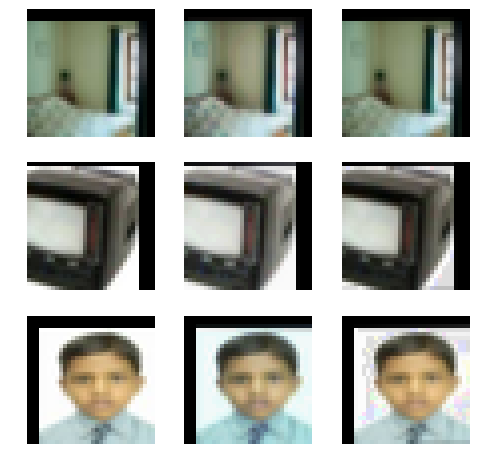

In [13]:
augmix_vis("cifar100_augmix_corrupted", 3)

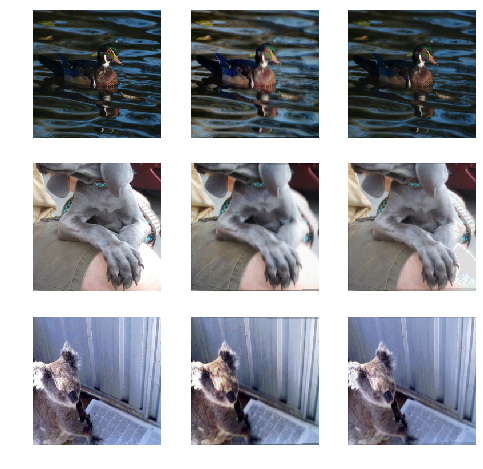

In [14]:
augmix_vis("imagenet100_augmix_corrupted", 3, IMAGENET_PATH)

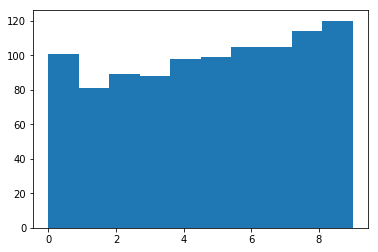

In [47]:
vis_labels("cifar10")

Files already downloaded and verified
Files already downloaded and verified


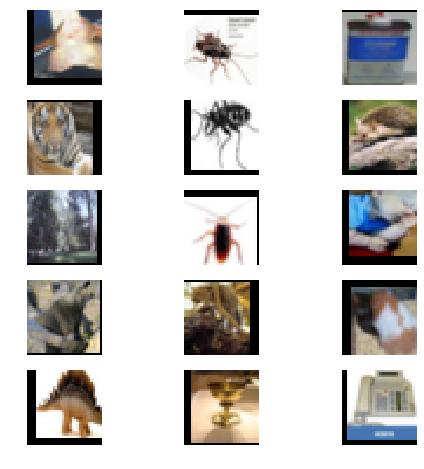

In [38]:
vis("cifar100", 5)

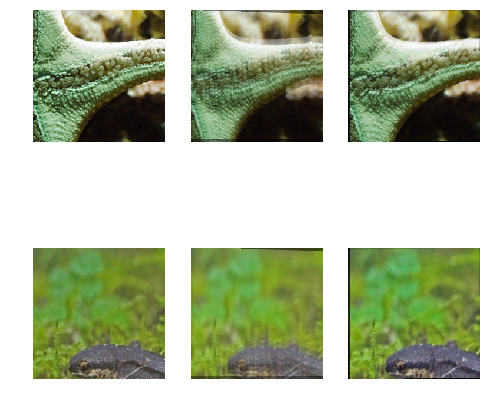

In [24]:
augmix_vis("imagenet100_augmix_corrupted", 2, IMAGENET_PATH)

Files already downloaded and verified
Files already downloaded and verified


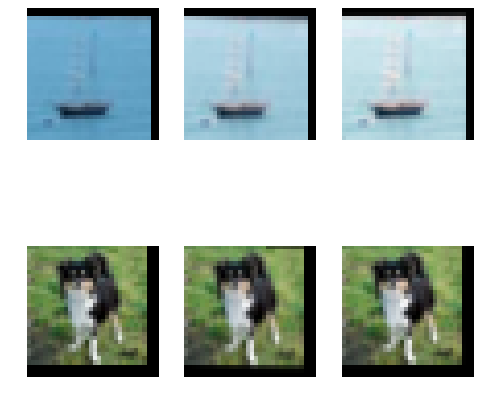

In [25]:
augmix_vis("cifar10_augmix_corrupted", 2)

FileNotFoundError: [Errno 2] No such file or directory: '/misc/lmbraid19/hoffmaja/datasets/train'

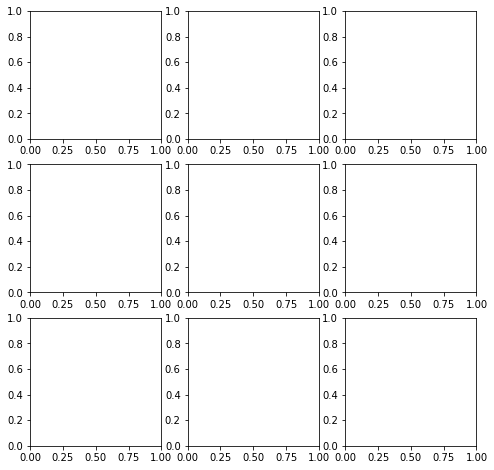

In [9]:
augmix_vis("imagenet100_augmix", 3)

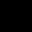

In [23]:
Image.fromarray(arr.numpy())

In [3]:
next(iter(dm.train_dataloader()))

[[tensor([[[[-1.9879e+00, -6.3833e-01, -6.7008e-01,  ..., -5.7482e-01,
             -6.3833e-01, -6.7008e-01],
            [-1.9879e+00, -8.4472e-01, -8.7648e-01,  ..., -7.9709e-01,
             -8.4472e-01, -8.7648e-01],
            [-1.9879e+00, -7.0183e-01, -7.4946e-01,  ..., -6.7008e-01,
             -6.8596e-01, -7.3359e-01],
            ...,
            [-1.9879e+00, -1.5592e+00, -1.5274e+00,  ..., -1.3528e+00,
             -1.4163e+00, -1.4639e+00],
            [-1.9879e+00, -1.5433e+00, -1.5274e+00,  ..., -1.4322e+00,
             -1.5116e+00, -1.5751e+00],
            [-1.9879e+00, -1.2734e+00, -1.2734e+00,  ..., -1.2893e+00,
             -1.2734e+00, -1.2416e+00]],
  
           [[-1.9844e+00, -3.1647e-02,  6.2941e-04,  ...,  6.5182e-02,
              3.2906e-02,  1.6768e-02],
            [-1.9844e+00, -1.6075e-01, -1.1234e-01,  ..., -1.5509e-02,
             -4.7785e-02, -8.0061e-02],
            [-1.9844e+00, -1.1234e-01, -9.6199e-02,  ...,  3.2906e-02,
             -1.5509

In [29]:
c100 = CIFAR100C(DATA_PATH, distortion="snow")
c10 = CIFAR10C(DATA_PATH, distortion="snow")

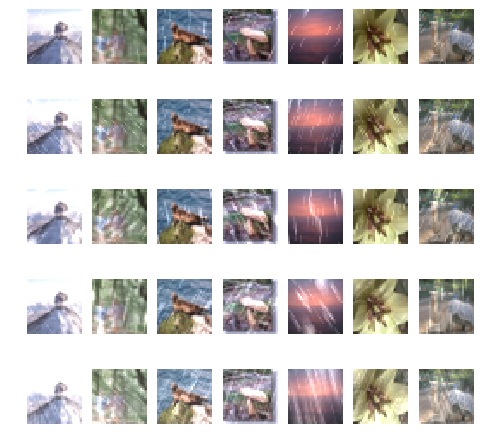

In [31]:
display_level(c100)

In [24]:
def create_cifar_c(distortion: str):
    images_path = os.path.join(CIFAR_C_PATH, distortion + ".npy")
    labels_path = os.path.join(CIFAR_C_PATH, "labels.npy")
    images = torch.from_numpy(np.load(images_path))
    labels = torch.from_numpy(np.load(labels_path))
    return TensorDataset(images, labels)

def display_level(data):
    fig, axes = plt.subplots(5, 7, figsize=(8, 8))
    for lvl, row in enumerate(axes):
        for idx, ax in enumerate(row):
            ax.imshow(data[lvl * 10000 + idx][0])
            ax.axis('off')

In [58]:
data = create_cifar_c("gaussian_noise")

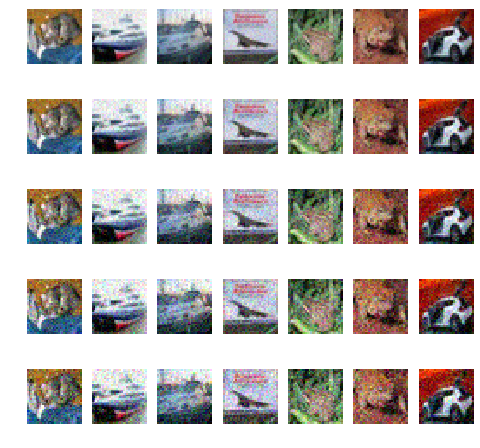

In [61]:
display_level(data)